In [1]:
%matplotlib inline

# Imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import sklearn
import numpy as np
from sklearn import metrics

In [2]:
# Import data
NBE_df = pd.read_excel('ML_Model_Data_2019.xls', sheet_name='Base Model')
NBE_df.head()
# print(" ***********************")
# print(NBE_df.head())

,Bridge_Number,Steel_Element,CS1,CS2,CS3,CS4,MAINTENANCE_021,Bridge_Age,ADT_029,DEGREES_SKEW_034,...,hplus_2019,SO4_2019,Cl_2019,totalN_201,NO3_2019,NH4_2019,Na_2019,K_2019,Mg_2019,Ca_2019
0,10029,28,1.000000,0.0,0.000000,0.0,2,56,10000,0,...,0.11837,6.12682,7.79553,2.85422,7.68722,1.43818,4.22655,0.44474,0.58365,1.34667
1,10029,29,0.925926,0.0,0.074074,0.0,2,56,10000,0,...,0.11837,6.12682,7.79553,2.85422,7.68722,1.43818,4.22655,0.44474,0.58365,1.34667
2,10029,107,0.997257,0.0,0.002743,0.0,2,56,10000,0,...,0.11837,6.12682,7.79553,2.85422,7.68722,1.43818,4.22655,0.44474,0.58365,1.34667
3,10029,113,0.973971,0.0,0.026029,0.0,2,56,10000,0,...,0.11837,6.12682,7.79553,2.85422,7.68722,1.43818,4.22655,0.44474,0.58365,1.34667
4,10029,152,0.986301,0.0,0.013699,0.0,2,56,10000,0,...,0.11837,6.12682,7.79553,2.85422,7.68722,1.43818,4.22655,0.44474,0.58365,1.34667


In [3]:
#Filter Element Data
NBE_element_df = NBE_df[NBE_df['Steel_Element'] == 107] 
# print(NBE_element_df)
NBE_element_df.head()

,Bridge_Number,Steel_Element,CS1,CS2,CS3,CS4,MAINTENANCE_021,Bridge_Age,ADT_029,DEGREES_SKEW_034,...,hplus_2019,SO4_2019,Cl_2019,totalN_201,NO3_2019,NH4_2019,Na_2019,K_2019,Mg_2019,Ca_2019
2,10029,107,0.997257,0.000000,0.002743,0.000000,2,56,10000,0,...,0.118370,6.12682,7.79553,2.85422,7.68722,1.43818,4.22655,0.444740,0.583650,1.34667
6,10064,107,0.775188,0.199990,0.000000,0.024822,2,48,2180,0,...,0.117853,6.16344,8.01924,2.86259,7.63897,1.46299,4.35121,0.496504,0.598910,1.35278
7,10065,107,0.000000,0.021935,0.000000,0.978065,1,40,7500,22,...,0.117803,6.16788,8.04684,2.86352,7.63311,1.46589,4.36662,0.502772,0.600775,1.35345
8,10066,107,0.080959,0.041157,0.000000,0.877885,2,36,500,0,...,0.118218,6.14559,7.92248,2.85707,7.65769,1.45044,4.29773,0.473696,0.592106,1.34860
9,10069,107,1.000000,0.000000,0.000000,0.000000,2,36,500,0,...,0.118165,6.14710,7.92923,2.85774,7.65646,1.45167,4.30138,0.475465,0.592618,1.34911


In [4]:
NBE_element_df.columns

Index(['Bridge_Number', 'Steel_Element', 'CS1', 'CS2', 'CS3', 'CS4',
       'MAINTENANCE_021', 'Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034',
       'SERVICE_ON_042A', 'SERVICE_UND_042B', 'STRUCTURE_KIND_043A',
       'STRUCTURE_TYPE_043B', 'APPR_KIND_044A', 'APPR_TYPE_044B',
       'DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060',
       'OPERATING_RATING_064', 'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067',
       'APPR_ROAD_EVAL_072', 'DECK_STRUCTURE_TYPE_107', 'SURFACE_TYPE_108A',
       'MEMBRANE_TYPE_108B', 'DECK_PROTECTION_108C', 'PERCENT_ADT_TRUCK_109',
       'BRIDGE_CONDITION', 'temp_dp_2m', 'avg_rh_2m', 'temp_a_10m',
       'temp_a_2m', 'temp_a_60c', 'temp_s_2cm', 'ppt_2019', 'hplus_2019',
       'SO4_2019', 'Cl_2019', 'totalN_201', 'NO3_2019', 'NH4_2019', 'Na_2019',
       'K_2019', 'Mg_2019', 'Ca_2019'],
      dtype='object')

In [5]:
# Normalizing Data
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
scale_features = ['Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034',
       'DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060',
       'OPERATING_RATING_064', 'INVENTORY_RATING_066', 'STRUCTURAL_EVAL_067',
       'APPR_ROAD_EVAL_072', 'PERCENT_ADT_TRUCK_109',
       'temp_dp_2m', 'avg_rh_2m', 'temp_a_10m',
       'temp_a_2m', 'temp_a_60c', 'temp_s_2cm', 'ppt_2019', 'hplus_2019',
       'SO4_2019', 'Cl_2019', 'totalN_201', 'NO3_2019', 'NH4_2019', 'Na_2019',
       'K_2019', 'Mg_2019', 'Ca_2019']
#NBE_element_df [scale_features] = ss.DataFrame(scale_features.fit_transform(NBE_element_df[scale_features]), columns=NBE_element_df[scale_features].columns)
NBE_element_df.loc[:, scale_features] = ss.fit_transform(NBE_element_df.loc[:, scale_features])

E:\Winpython Installation\WPy64-3771\python-3.7.7.amd64\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [6]:
NBE_element_df

,Bridge_Number,Steel_Element,CS1,CS2,CS3,CS4,MAINTENANCE_021,Bridge_Age,ADT_029,DEGREES_SKEW_034,...,hplus_2019,SO4_2019,Cl_2019,totalN_201,NO3_2019,NH4_2019,Na_2019,K_2019,Mg_2019,Ca_2019
2,10029,107,0.997257,0.000000,0.002743,0.000000,2,0.500000,0.042017,0.000000,...,0.494609,0.532080,0.336143,0.595772,0.710107,0.352807,0.330324,0.073394,0.305766,0.591362
6,10064,107,0.775188,0.199990,0.000000,0.024822,2,0.424528,0.009160,0.000000,...,0.489450,0.542569,0.356683,0.600556,0.694793,0.365485,0.351628,0.099410,0.325390,0.596544
7,10065,107,0.000000,0.021935,0.000000,0.978065,1,0.349057,0.031513,0.222222,...,0.488951,0.543841,0.359217,0.601087,0.692934,0.366967,0.354262,0.102561,0.327788,0.597112
8,10066,107,0.080959,0.041157,0.000000,0.877885,2,0.311321,0.002101,0.000000,...,0.493092,0.537456,0.347799,0.597401,0.700735,0.359072,0.342489,0.087947,0.316640,0.592999
9,10069,107,1.000000,0.000000,0.000000,0.000000,2,0.311321,0.002101,0.000000,...,0.492564,0.537889,0.348419,0.597784,0.700344,0.359700,0.343112,0.088836,0.317298,0.593432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,940076,107,0.996779,0.003221,0.000000,0.000000,31,0.556604,0.084664,0.212121,...,0.438786,0.615417,0.533072,0.619890,0.522180,0.468548,0.535667,0.337219,0.493132,0.625921
1985,940082,107,0.992216,0.007784,0.000000,0.000000,31,0.584906,0.102172,0.212121,...,0.413300,0.636387,0.557461,0.641603,0.511710,0.498427,0.559764,0.373094,0.520069,0.646520
1986,940096,107,1.000000,0.000000,0.000000,0.000000,1,0.386792,0.123139,0.212121,...,0.453695,0.603507,0.519186,0.607454,0.528492,0.451291,0.521963,0.316486,0.477740,0.614201
1987,940097,107,1.000000,0.000000,0.000000,0.000000,1,0.386792,0.114500,0.212121,...,0.453695,0.603507,0.519186,0.607454,0.528492,0.451291,0.521963,0.316486,0.477740,0.614201


In [9]:
# # Categorical data Encoding
# from sklearn.preprocessing import OrdinalEncoder

# ord_enc = OrdinalEncoder()
# NBE_element_df["BRIDGE_CONDITION_CODE"] = ord_enc.fit_transform(NBE_element_df[["BRIDGE_CONDITION"]])
# NBE_element_df[["BRIDGE_CONDITION", "BRIDGE_CONDITION_CODE"]].head(11)

In [11]:
# One Hot Encoder
data=pd.get_dummies(NBE_element_df, columns=["MAINTENANCE_021", "SERVICE_ON_042A", "SERVICE_UND_042B", "STRUCTURE_KIND_043A", 
                                        "STRUCTURE_TYPE_043B", "APPR_KIND_044A", "APPR_TYPE_044B", "DECK_STRUCTURE_TYPE_107", 
                                        "SURFACE_TYPE_108A", "MEMBRANE_TYPE_108B", "DECK_PROTECTION_108C", "BRIDGE_CONDITION"]).head()

In [12]:
data

,Bridge_Number,Steel_Element,CS1,CS2,CS3,CS4,Bridge_Age,ADT_029,DEGREES_SKEW_034,DECK_COND_058,...,MEMBRANE_TYPE_108B_8,DECK_PROTECTION_108C_0,DECK_PROTECTION_108C_1,DECK_PROTECTION_108C_6,DECK_PROTECTION_108C_7,DECK_PROTECTION_108C_8,DECK_PROTECTION_108C_9,BRIDGE_CONDITION_1,BRIDGE_CONDITION_2,BRIDGE_CONDITION_3
2,10029,107,0.997257,0.000000,0.002743,0.000000,0.500000,0.042017,0.000000,0.714286,...,0,1,0,0,0,0,0,0,1,0
6,10064,107,0.775188,0.199990,0.000000,0.024822,0.424528,0.009160,0.000000,0.571429,...,0,1,0,0,0,0,0,0,1,0
7,10065,107,0.000000,0.021935,0.000000,0.978065,0.349057,0.031513,0.222222,0.714286,...,0,1,0,0,0,0,0,0,0,1
8,10066,107,0.080959,0.041157,0.000000,0.877885,0.311321,0.002101,0.000000,0.714286,...,0,1,0,0,0,0,0,0,1,0
9,10069,107,1.000000,0.000000,0.000000,0.000000,0.311321,0.002101,0.000000,0.714286,...,0,1,0,0,0,0,0,0,0,1


In [13]:
data.columns

Index(['Bridge_Number', 'Steel_Element', 'CS1', 'CS2', 'CS3', 'CS4',
       'Bridge_Age', 'ADT_029', 'DEGREES_SKEW_034', 'DECK_COND_058',
       ...
       'MEMBRANE_TYPE_108B_8', 'DECK_PROTECTION_108C_0',
       'DECK_PROTECTION_108C_1', 'DECK_PROTECTION_108C_6',
       'DECK_PROTECTION_108C_7', 'DECK_PROTECTION_108C_8',
       'DECK_PROTECTION_108C_9', 'BRIDGE_CONDITION_1', 'BRIDGE_CONDITION_2',
       'BRIDGE_CONDITION_3'],
      dtype='object', length=117)

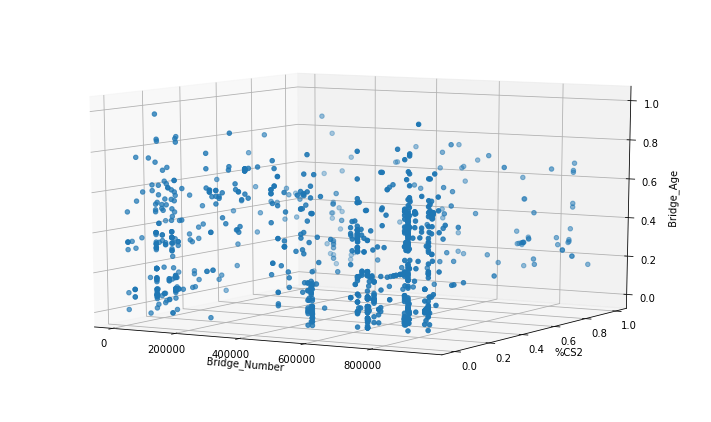

In [14]:
#3D Visualization
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

#nbe_df = NBE_df[nbe_df['STRUCNUM'] <=1000]
ax.scatter(xs=NBE_element_df['Bridge_Number'], ys=NBE_element_df['CS2'], zs=NBE_element_df['Bridge_Age'])

ax.set_ylabel('%CS2'); ax.set_xlabel('Bridge_Number'); ax.set_zlabel('Bridge_Age')
ax.view_init(10, -60)
#plt.savefig('%CS2.png', dpi=300)

E:\Winpython Installation\WPy64-3771\python-3.7.7.amd64\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


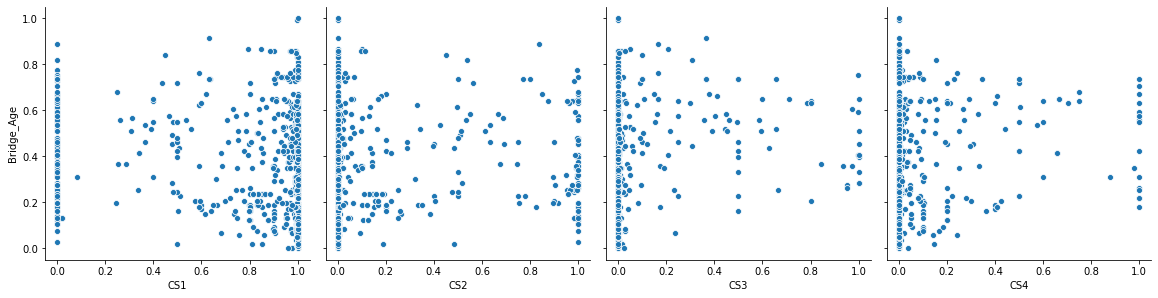

In [15]:
# 2D Visulization
# Using pairplot we'll visualize the data for correlation
sns.pairplot(NBE_element_df, x_vars=['CS1', 'CS2','CS3','CS4'], 
             y_vars='Bridge_Age', size=4, aspect=1, kind='scatter')
plt.show()

In [53]:
#Multi Output SVM
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

X = data.loc[:,['ADT_029', 'Bridge_Age','INVENTORY_RATING_066', 'OPERATING_RATING_064', 'PERCENT_ADT_TRUCK_109', 'DECK_COND_058', 'SUPERSTRUCTURE_COND_059']]
Y = data.loc[:,['CS1', 'CS2','CS3','CS4']]

# X_train, X_test, y_train, y_test = np.asarray(train_test_split(X, Y, test_size=0.1))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [54]:
# X

In [55]:
# Fit the model
Model = LinearSVR()
wrapper = MultiOutputRegressor(Model)
wrapper.fit(X_train, y_train)

MultiOutputRegressor(estimator=LinearSVR())

In [56]:
# print(Model.coef_)

In [57]:
# print(Model.intercept_)

In [58]:
# pd.DataFrame(Model.coef_, X.columns, columns = ['Coeff1', 'Coeff2'])

In [59]:
# X.iloc[-3:-1,:]

In [60]:
# Y.iloc[-3:-1,:]

In [61]:
predictions = wrapper.predict(data.loc[:,['ADT_029', 'Bridge_Age','INVENTORY_RATING_066', 'OPERATING_RATING_064', 'PERCENT_ADT_TRUCK_109', 'DECK_COND_058', 'SUPERSTRUCTURE_COND_059']])

In [62]:
predictions

array([[ 8.50844303e-01,  2.82376105e-05,  2.74228876e-03,
         0.00000000e+00],
       [ 7.75188026e-01,  4.77546602e-02, -1.30104261e-18,
         2.49094874e-02],
       [ 7.43657437e-01,  2.19354124e-02, -1.95183781e-07,
         1.90811508e-01],
       [ 7.45167378e-01,  3.67153091e-02, -4.37529124e-04,
         1.50960652e-01],
       [ 7.45867178e-01,  3.69779306e-02, -4.35674626e-04,
         1.49182758e-01]])

In [63]:
NBE_element_df.loc[:,['CS1', 'CS2', 'CS3', 'CS4']]

,CS1,CS2,CS3,CS4
2,0.997257,0.000000,0.002743,0.000000
6,0.775188,0.199990,0.000000,0.024822
7,0.000000,0.021935,0.000000,0.978065
8,0.080959,0.041157,0.000000,0.877885
9,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...
1984,0.996779,0.003221,0.000000,0.000000
1985,0.992216,0.007784,0.000000,0.000000
1986,1.000000,0.000000,0.000000,0.000000
1987,1.000000,0.000000,0.000000,0.000000


In [64]:
# NBE_df.loc[4730:,['Bridge Age', 'ADT_029']]

In [65]:
X_test

,ADT_029,Bridge_Age,INVENTORY_RATING_066,OPERATING_RATING_064,PERCENT_ADT_TRUCK_109,DECK_COND_058,SUPERSTRUCTURE_COND_059
9,0.002101,0.311321,0.451234,0.640641,0.037736,0.714286,0.714286
8,0.002101,0.311321,0.453584,0.645646,0.037736,0.714286,0.714286


In [67]:
# make predictions for Input Bridge Age and ADT_29
print('[%CS1, %CS2, %CS3, %CS4]:', wrapper.predict([[0.002101,0.311321,0.453584,0.645646,0.037736,0.571429,0.571429]]))
print('Score: ', wrapper.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(data.loc[:,['CS1', 'CS2', 'CS3', 'CS4']], predictions))
print('MSE:', metrics.mean_squared_error(data.loc[:,['CS1', 'CS2', 'CS3', 'CS4']], predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(data.loc[:,['CS1', 'CS2', 'CS3', 'CS4']], predictions)))
print('R-Square:',metrics.r2_score(data.loc[:,['CS1', 'CS2', 'CS3', 'CS4']], predictions))

[%CS1, %CS2, %CS3, %CS4]: [[ 7.03102281e-01  3.21728455e-02 -2.24692505e-04  1.32705403e-01]]
Score:  -0.3161039622452671
MAE: 0.18332081592177435
MSE: 0.11376124152172742
RMSE: 0.33728510420966923
R-Square: 0.20327260684815013


In [ ]:
y_test

In [28]:
np.ndim([50,7500])

1